In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [4]:
ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [5]:
ratings

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [6]:
# Load movie titles
movies = pd.read_csv('u.item', sep='|', encoding='latin-1', 
                     names=['movie_id', 'title', 'release_date', 'video_release', 'imdb_url'] + [f'genre_{i}' for i in range(19)],
                     usecols=['movie_id', 'title'])

print("\nMovies:")
print(movies.head(10))


Movies:
   movie_id                                              title
0         1                                   Toy Story (1995)
1         2                                   GoldenEye (1995)
2         3                                  Four Rooms (1995)
3         4                                  Get Shorty (1995)
4         5                                     Copycat (1995)
5         6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6         7                              Twelve Monkeys (1995)
7         8                                        Babe (1995)
8         9                            Dead Man Walking (1995)
9        10                                 Richard III (1995)


In [7]:
movies

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [12]:
# Combine ratings with movie titles
data = ratings.merge(movies, on='movie_id')

# Just type the variable name to display it
data.head(10)

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)
5,298,474,4,884182806,Dr. Strangelove or: How I Learned to Stop Worr...
6,115,265,2,881171488,"Hunt for Red October, The (1990)"
7,253,465,5,891628467,"Jungle Book, The (1994)"
8,305,451,3,886324817,Grease (1978)
9,6,86,3,883603013,"Remains of the Day, The (1993)"


In [13]:
# See most rated movies
most_rated = data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
most_rated

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

Text(0, 0.5, 'Count')

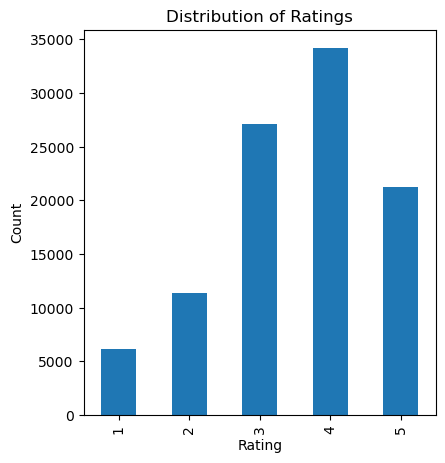

In [18]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
data["rating"].value_counts().sort_index().plot(kind = "bar")
plt.title("Distribution of Ratings")
plt.xlabel('Rating')
plt.ylabel('Count')

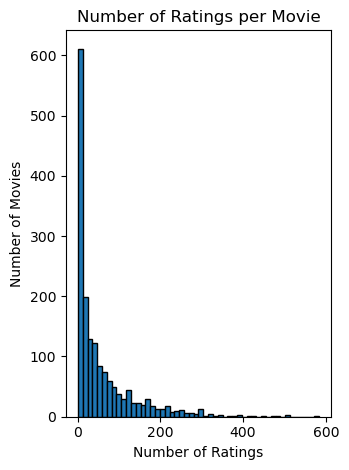

In [19]:
plt.subplot(1,2,1)
ratings_per_movie = data.groupby('movie_id')['rating'].count()
plt.hist(ratings_per_movie, bins=50, edgecolor='black')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')


plt.tight_layout()
plt.show()


In [20]:
# Create a user-movie matrix (rows=users, columns=movies, values=ratings)
user_movie_matrix = data.pivot_table(index='user_id', columns='title', values='rating')

print(user_movie_matrix.shape)
user_movie_matrix.head()

(943, 1664)


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [23]:
# Fill NaN values with 0 (movies users didn't rate)
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Calculate cosine similarity between movies
# We transpose so movies are rows (sklearn compares rows)
movie_similarity = cosine_similarity(user_movie_matrix_filled.T)

# Put it in a DataFrame so it's easier to work with
movie_similarity_df = pd.DataFrame(movie_similarity, 
                                    index=user_movie_matrix.columns,
                                    columns=user_movie_matrix.columns)

movie_similarity_df.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000,0.000000,0.024561,0.099561,0.185236,0.159265,0.000000,0.052203,0.000000,0.033326,...,0.000000,0.000000,0.000000,0.027774,0.118840,0.142315,0.029070,0.000000,0.110208,0.000000
1-900 (1994),0.000000,1.000000,0.014139,0.009294,0.007354,0.004702,0.010055,0.067038,0.000000,0.000000,...,0.152499,0.015484,0.000000,0.069284,0.018243,0.023408,0.006694,0.079640,0.042295,0.000000
101 Dalmatians (1996),0.024561,0.014139,1.000000,0.167006,0.061105,0.143878,0.203781,0.225803,0.027642,0.092337,...,0.000000,0.021965,0.030905,0.274877,0.204267,0.101199,0.056976,0.172155,0.045714,0.000000
12 Angry Men (1957),0.099561,0.009294,0.167006,1.000000,0.056822,0.167235,0.304078,0.422506,0.072682,0.394854,...,0.060946,0.016502,0.000000,0.403270,0.259436,0.145519,0.105226,0.038901,0.060101,0.081261
187 (1997),0.185236,0.007354,0.061105,0.056822,1.000000,0.132327,0.042928,0.065060,0.043133,0.027300,...,0.000000,0.141997,0.000000,0.068257,0.067786,0.091293,0.099490,0.025184,0.142667,0.096449


In [24]:
def get_recommendations(movie_title, top_n=10):
    """
    Get top N similar movies to the given movie
    """
    # Get similarity scores for this movie
    similar_scores = movie_similarity_df[movie_title].sort_values(ascending=False)
    
    # Skip the first one (it's the movie itself with similarity = 1.0)
    recommendations = similar_scores[1:top_n+1]
    
    return recommendations

# Test it out!
movie_name = "Star Wars (1977)"
print(f"If you liked '{movie_name}', you might also like:\n")
get_recommendations(movie_name)

If you liked 'Star Wars (1977)', you might also like:



title
Return of the Jedi (1983)                    0.884476
Raiders of the Lost Ark (1981)               0.764885
Empire Strikes Back, The (1980)              0.749819
Toy Story (1995)                             0.734572
Godfather, The (1972)                        0.697332
Independence Day (ID4) (1996)                0.692837
Indiana Jones and the Last Crusade (1989)    0.689343
Fargo (1996)                                 0.686533
Silence of the Lambs, The (1991)             0.676428
Star Trek: First Contact (1996)              0.673975
Name: Star Wars (1977), dtype: float64

In [25]:
def get_recommendations_from_list(movie_list, top_n=10):
    """
    Get recommendations based on multiple movies you liked
    """
    # Get similarity scores for each movie in the list
    all_scores = pd.Series(dtype=float)
    
    for movie in movie_list:
        if movie in movie_similarity_df.columns:
            all_scores = all_scores.add(movie_similarity_df[movie], fill_value=0)
        else:
            print(f"Warning: '{movie}' not found in database")
    
    # Remove the movies that were in the input list
    all_scores = all_scores.drop(movie_list, errors='ignore')
    
    # Sort and get top N
    recommendations = all_scores.sort_values(ascending=False).head(top_n)
    
    return recommendations

# Test it!
my_favorites = ["Star Wars (1977)", "Toy Story (1995)", "The Matrix (1999)"]
get_recommendations_from_list(my_favorites)

title
Return of the Jedi (1983)                    1.584401
Raiders of the Lost Ark (1981)               1.387268
Independence Day (ID4) (1996)                1.382623
Empire Strikes Back, The (1980)              1.347790
Fargo (1996)                                 1.317133
Star Trek: First Contact (1996)              1.310702
Rock, The (1996)                             1.300515
Twelve Monkeys (1995)                        1.274278
Back to the Future (1985)                    1.260655
Indiana Jones and the Last Crusade (1989)    1.259490
dtype: float64

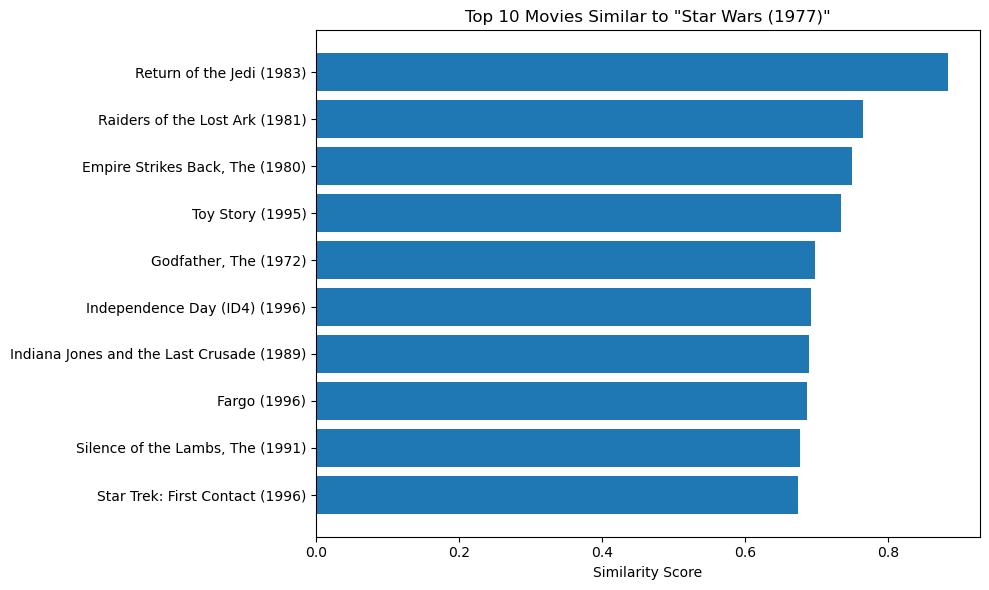

In [26]:
# Get recommendations
movie_name = "Star Wars (1977)"
recommendations = get_recommendations(movie_name, top_n=10)

# Plot them
plt.figure(figsize=(10, 6))
plt.barh(recommendations.index, recommendations.values)
plt.xlabel('Similarity Score')
plt.title(f'Top 10 Movies Similar to "{movie_name}"')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()